## Exploration of Our Spatial Component 

In this notebook we will explore the Moran's I and the weights for both our new predictors in the model and for the overdose rate. This will be done using the new data that was mentioned in the first notebook. 

In [26]:
# Import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl

#For basemap:
import contextily as cx

#For regression:
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices

import esda as esda
from esda.moran import Moran_Local
import splot as splot

#Plot spatial weights:
from libpysal.weights.contiguity import Queen
from splot.libpysal import plot_spatial_weights
from splot.esda import moran_scatterplot, plot_moran
from splot.esda import plot_local_autocorrelation

# For GWR
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import os

In [2]:
os.getcwd()

'/Users/meera/Documents/drugs/Reproducible'

In [3]:
# change directories - run only once
os.chdir(os.path.dirname(os.getcwd()))
os.chdir('Data')

In [4]:
os.getcwd()

'/Users/meera/Documents/drugs/Data'

In [5]:
df = gpd.read_file('geo_od_nonull.geojson')
df.dtypes

Year                             int64
State                           object
log_Overdose_Rate_per_100k     float64
Pct_Age_lt_18                  float64
log_Pct_Black                  float64
Potential_Years_Lost           float64
Pct_Uninsured                  float64
log_PrimCarePhys_per_100k      float64
Pct_Child_in_1ParentHH         float64
Pct_Poverty                    float64
log_Spatial_Mean               float64
geometry                      geometry
dtype: object

Using the above data file for our Moran's I situation. This data contains the differebt predictors that are used in our final model (notebook 07) also the ccorresponding geometry, Year, and State

We first find the Moran's I for the response variable which is going to be Overdose Rates and the log of the Overdose Rates  

In [6]:
#first we create the not log version of the Overdose Rates 
df['Overdose_Rate_per_100k'] = np.exp(df['log_Overdose_Rate_per_100k'])

In [7]:
#this is computing the weigths 
w = Queen.from_dataframe(df)
df_2 = df.drop(w.islands)
w2 = Queen.from_dataframe(df_2)

/Users/meera/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 41 disconnected components.
 There is 1 island with id: 7222.
  warnings.warn(message)
/Users/meera/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 40 disconnected components.
  warnings.warn(message)


In [8]:
y = df['Overdose_Rate_per_100k']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.43251598298204524

The above calculates the Moran's I for the Overdose rates. The above had to be done because we had islands in our guy. 

In [9]:
y = df['log_Overdose_Rate_per_100k']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.45518502381559756

Now we calculate the Moran's I for the predictors 

In [10]:
#MORANS I FOR PREDICTORS
y = df['Pct_Age_lt_18']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.5975728122537499

In [11]:
y = df['log_Pct_Black']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.6911321187840473

In [12]:
#checking to see if the Moran's I is the same or not 
df['Pct_Black'] = np.exp(df['log_Pct_Black'])

In [13]:
y = df['Pct_Black']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.6494256049771713

In [14]:
y = df['Potential_Years_Lost']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.6171366309347042

In [15]:
y = df['Pct_Uninsured']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.5258988348500594

In [16]:
#checking to see if the Moran's I is the same or not 
df['PrimCarePhys_per_100k'] = np.exp(df['log_PrimCarePhys_per_100k'])

In [17]:
y = df['PrimCarePhys_per_100k']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.2035666292618703

In [18]:
y = df['log_PrimCarePhys_per_100k']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.21736027463623062

In [19]:
y = df['Pct_Child_in_1ParentHH']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.3423822077150117

In [20]:
y = df['Pct_Poverty']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

0.482516144933146

Now this is an extension of what is coming up in the next notebooks. But these are our maps for the specific predictors. 

In [21]:
west_vir = df[df['State'] == 'West Virginia']

In [22]:
predictors = ['Pct_Black', 'Pct_Age_lt_18',
              'Pct_Uninsured', 'Pct_Poverty']

titles = ['Percent Black', 'Percent Age < 18', 'Percent Uninsured',
         'Percent Poverty']

In [23]:
mini = west_vir[predictors[1]].min()
maxi = west_vir[predictors[1]].max()
maxi

24.9

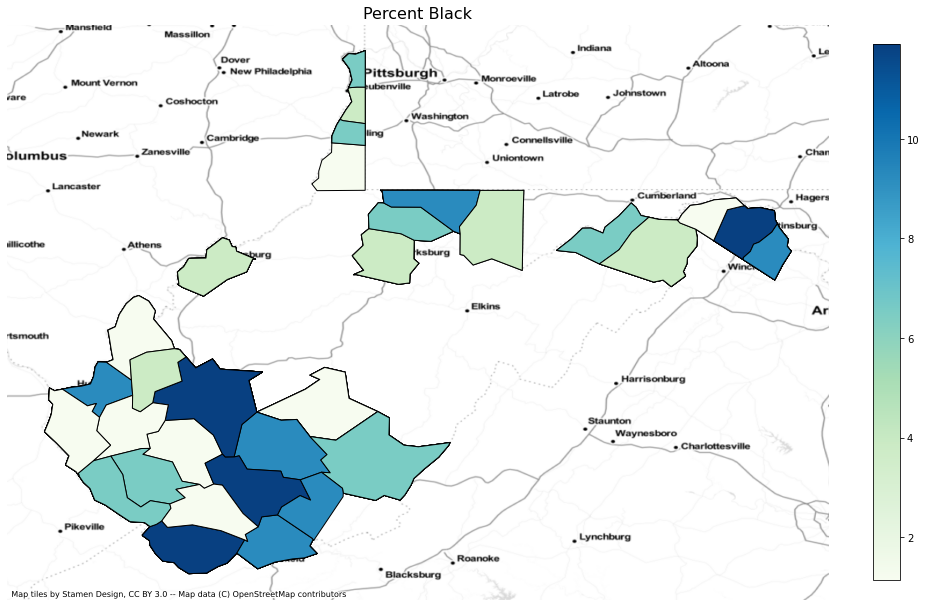

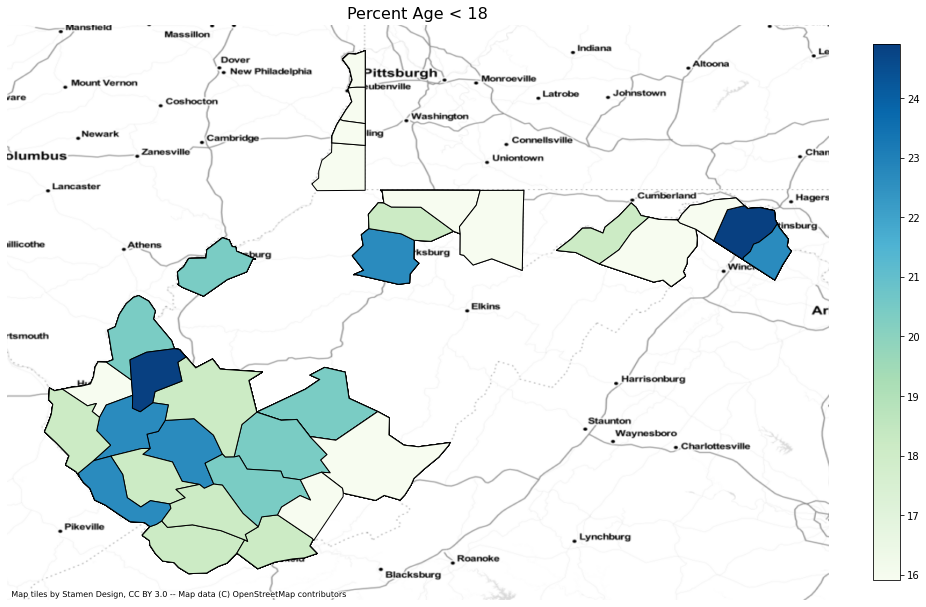

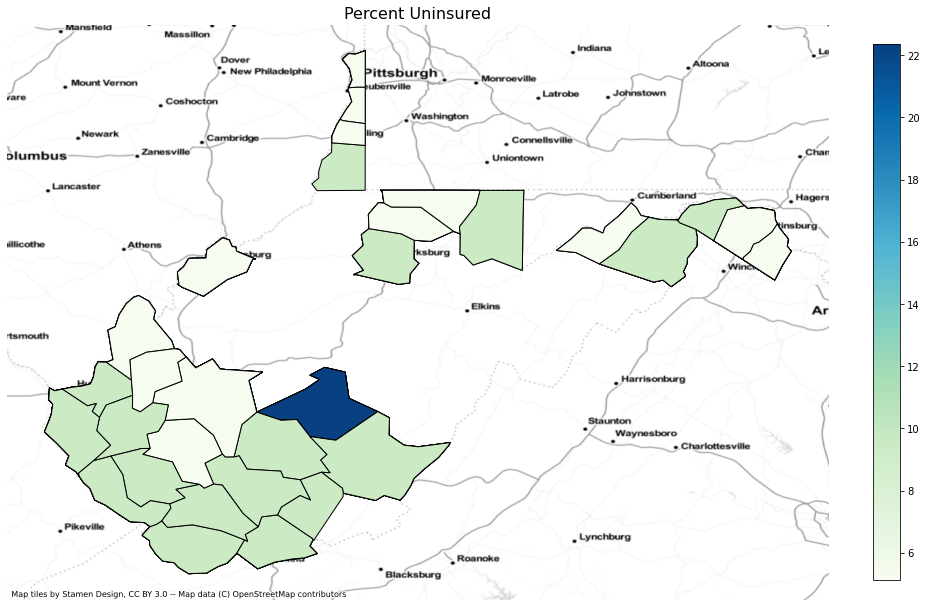

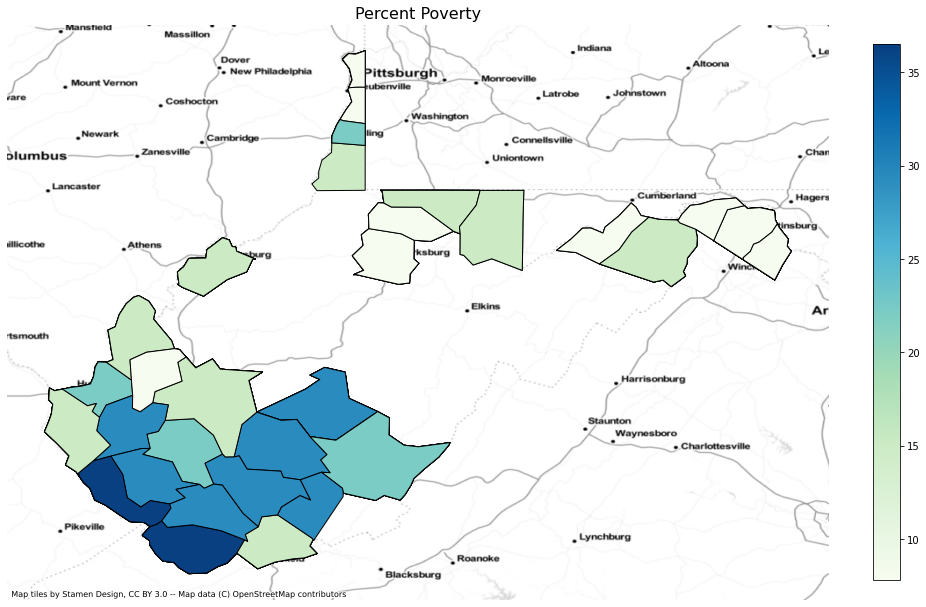

In [24]:
for i in range(4):
    
    mini = west_vir[predictors[i]].min()
    maxi = west_vir[predictors[i]].max()
    
    f,ax = plt.subplots(1,1,figsize=(16,17))

    west_vir.plot(column = predictors[i], ax=ax,
            scheme='quantiles', cmap='GnBu', k=5, edgecolor='black')
    ax.set_title(titles[i], fontsize=16)

    ax.axis('off')

    cx.add_basemap(ax, crs=west_vir.crs.to_string(), source=cx.providers.Stamen.TonerLite)


    sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=mini, vmax=maxi))
    sm.set_array = ([])
    f.colorbar(sm, fraction=0.03)

    #plt.show()
    
    #f.savefig(predictors[i] + '.png')

Now we are going to compute the Moran's I for the residuals. At the end of notebook 7 you see a map for the residuals but we actually computed the value here....

In [ ]:
import statsmodels.api as sm

In [27]:
# First we must define the model etc. 
y, X = dmatrices("log_Overdose_Rate_per_100k ~ Pct_Age_lt_18 + log_Pct_Black + Potential_Years_Lost + Pct_Uninsured +\
                 log_PrimCarePhys_per_100k + Pct_Child_in_1ParentHH +  Pct_Poverty + log_Spatial_Mean", 
                 data=df, return_type='dataframe')


mod = sm.OLS(y, X)
res = mod.fit()

In [28]:
y_pred_full = res.predict(X)

In [29]:
#putting the residuals in one column of a dataframe !! 
y = np.array(y)
y_pred_full = np.array(y_pred_full).reshape(8018,1)
resid = pd.DataFrame(y -  y_pred_full)
resid

,0
0,-0.368746
1,-0.682655
2,-0.837131
3,-0.208974
4,0.878448
...,...
8013,-0.038029
8014,0.115596
8015,0.034004
8016,0.477381


In [30]:
#Append it top the whole dataframe 
df = df.reset_index(drop = True)
df['Residuals'] = resid

In [31]:
df_2020 = df[df['Year']==2020]
df_2020 = df_2020.reset_index()

In [32]:
w = Queen.from_dataframe(df_2020)
df_2 = df_2020.drop(w.islands)
w2 = Queen.from_dataframe(df_2)

/Users/meera/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 46 disconnected components.
 There are 2 islands with ids: 225, 611.
  warnings.warn(message)
/Users/meera/opt/anaconda3/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 44 disconnected components.
  warnings.warn(message)


In [33]:
#The Moran's I for the residuals 
y = df_2020['Residuals']
y2 = y.reset_index(drop = True)
y3 = y2.drop(w.islands)
moran = esda.Moran(y3, w2)
moran.I

-0.09824571175355909

This is the Moran's I for just the residuals !! (Extended from notebook 7) We see (with the rule of thumnb of 0.3) that this is very small ! 